In [19]:
# =========================
#  Import Libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import hstack

In [20]:
df = pd.read_csv("European Restaurant Reviews.csv")
df

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...
...,...,...,...,...,...,...
1497,Cuba,Old Square (Plaza Vieja),Negative,The Tourism Trap,Oct 2016 •,Despite the other reviews saying that this is ...
1498,Cuba,Old Square (Plaza Vieja),Negative,the beer factory,Oct 2016 •,beer is good. food is awfull The only decent...
1499,Cuba,Old Square (Plaza Vieja),Negative,brewery,Oct 2016 •,"for terrible service of a truly comedic level,..."
1500,Cuba,Old Square (Plaza Vieja),Negative,It's nothing exciting over there,Oct 2016 •,We visited the Havana's Club Museum which is l...


Naive Bayes Test Accuracy: 0.8538205980066446
              precision    recall  f1-score   support

    Negative       1.00      0.10      0.19        49
    Positive       0.85      1.00      0.92       252

    accuracy                           0.85       301
   macro avg       0.93      0.55      0.55       301
weighted avg       0.88      0.85      0.80       301



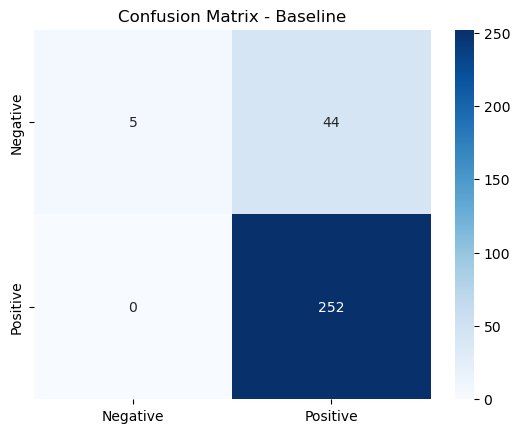

In [21]:

# =========================
# 2️⃣ Load Dataset
# =========================
df = pd.read_csv("European Restaurant Reviews.csv")
df = df.dropna(subset=['Review', 'Sentiment'])

text_col = "Review"
target_col = "Sentiment"
df
# =========================
# 3️⃣ Feature Engineering
# =========================
df['review_length'] = df['Review'].apply(len)
df['word_count'] = df['Review'].apply(lambda x: len(x.split()))
df['exclamation_count'] = df['Review'].apply(lambda x: x.count('!'))


# =========================
# 4️⃣ Split Dataset
# =========================
X_text = df[text_col]
X_num = df[['review_length','word_count','exclamation_count']].values
y = df[target_col]

X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_num, y, test_size=0.2, random_state=42
)

# =========================
# 5️⃣ TF-IDF Vectorization
# =========================
tfidf = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# دمج TF-IDF مع الميزات العددية
X_train_combined = hstack([X_train_tfidf, X_train_num])
X_test_combined = hstack([X_test_tfidf, X_test_num])

# =========================
# 6️⃣ Train Naive Bayes Model
# =========================
nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train_combined, y_train)

# =========================
# 7️⃣ Evaluation
# =========================
y_pred = nb_model.predict(X_test_combined)
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix - Baseline")
plt.show()


In [22]:
# 2️⃣ Load Dataset
# =========================
df = pd.read_csv("European Restaurant Reviews.csv")
df = df.dropna(subset=['Review', 'Sentiment'])
df.columns
df

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...
...,...,...,...,...,...,...
1497,Cuba,Old Square (Plaza Vieja),Negative,The Tourism Trap,Oct 2016 •,Despite the other reviews saying that this is ...
1498,Cuba,Old Square (Plaza Vieja),Negative,the beer factory,Oct 2016 •,beer is good. food is awfull The only decent...
1499,Cuba,Old Square (Plaza Vieja),Negative,brewery,Oct 2016 •,"for terrible service of a truly comedic level,..."
1500,Cuba,Old Square (Plaza Vieja),Negative,It's nothing exciting over there,Oct 2016 •,We visited the Havana's Club Museum which is l...


In [23]:
# =========================
# 3️⃣ Feature Engineering (Enhanced)
# =========================
df['review_length'] = df['Review'].apply(len)  # length of the review
df['word_count'] = df['Review'].apply(lambda x: len(x.split()))  # number of words
df['exclamation_count'] = df['Review'].apply(lambda x: x.count('!'))  # number of '!'
df['question_count'] = df['Review'].apply(lambda x: x.count('?'))  # number of '?'

# Simple positive and negative word lists
positive_words = ['amazing', 'excellent', 'good', 'nice', 'delicious', 'perfect', 'best']
negative_words = ['bad', 'terrible', 'horrible', 'awful', 'disappointing', 'worst']

df['pos_word_count'] = df['Review'].apply(lambda x: sum(word in x.lower() for word in positive_words))  # count of positive words
df['neg_word_count'] = df['Review'].apply(lambda x: sum(word in x.lower() for word in negative_words))  # count of negative words

num_features = ['review_length','word_count','exclamation_count','question_count','pos_word_count','neg_word_count']


In [24]:
# =========================
# 4️⃣ Split Dataset
# =========================
X_text = df['Review']  # text feature
X_num = df[num_features].values  # numerical features
y = df['Sentiment']  # target

X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_num, y, test_size=0.2, random_state=42
)


In [25]:
# =========================
# 5️⃣ TF-IDF Vectorization (Enhanced)
# =========================
tfidf = TfidfVectorizer(stop_words='english', max_features=8000, ngram_range=(1,3), min_df=5, max_df=0.8)
X_train_tfidf = tfidf.fit_transform(X_train_text)  # fit and transform training data
X_test_tfidf = tfidf.transform(X_test_text)  # transform test data

# Combine TF-IDF features with numerical features
X_train_combined = hstack([X_train_tfidf, X_train_num])
X_test_combined = hstack([X_test_tfidf, X_test_num])

In [26]:
# =========================
# 6️⃣ Train Naive Bayes Model
# =========================
nb_model = MultinomialNB(alpha=0.5)  # Laplace smoothing
nb_model.fit(X_train_combined, y_train)



MultinomialNB(alpha=0.5)

Improved Naive Bayes Test Accuracy: 0.920265780730897
              precision    recall  f1-score   support

    Negative       0.73      0.82      0.77        49
    Positive       0.96      0.94      0.95       252

    accuracy                           0.92       301
   macro avg       0.85      0.88      0.86       301
weighted avg       0.92      0.92      0.92       301



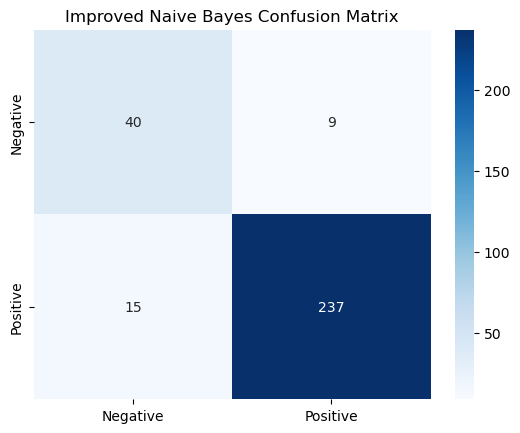

In [27]:
# =========================
# 7️⃣ Evaluation
# =========================
y_pred = nb_model.predict(X_test_combined)
print("Improved Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Improved Naive Bayes Confusion Matrix")
plt.show()

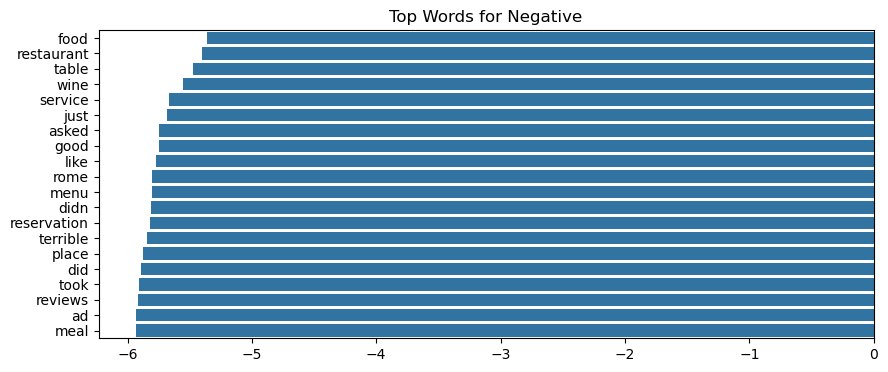

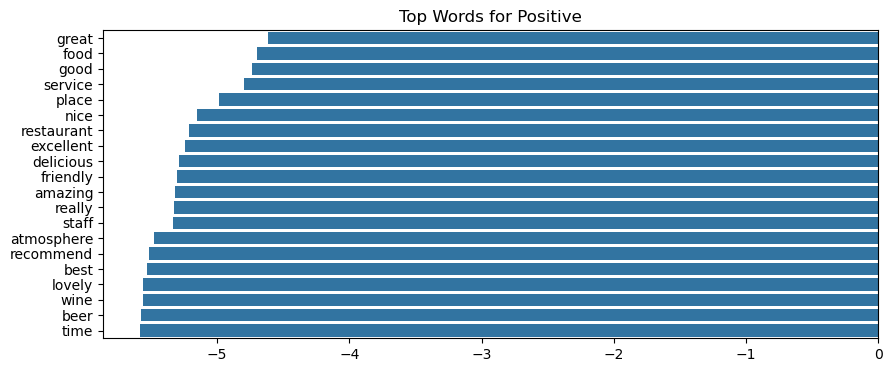

In [28]:
# =========================
# 8️⃣ Top Words per Sentiment
# =========================
nb_tfidf_only = MultinomialNB(alpha=0.5)
nb_tfidf_only.fit(X_train_tfidf, y_train)

feature_names = np.array(tfidf.get_feature_names_out())
class_labels = nb_tfidf_only.classes_

for i, class_label in enumerate(class_labels):
    top20_indices = np.argsort(nb_tfidf_only.feature_log_prob_[i])[-20:]
    top20_words = feature_names[top20_indices][::-1]
    top20_probs = nb_tfidf_only.feature_log_prob_[i][top20_indices][::-1]
    
    plt.figure(figsize=(10,4))
    sns.barplot(x=top20_probs, y=top20_words)
    plt.title(f"Top Words for {class_label}")
    plt.show()

C:\Users\USER PC\AppData\Local\Temp\ipykernel_25916\1289292472.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


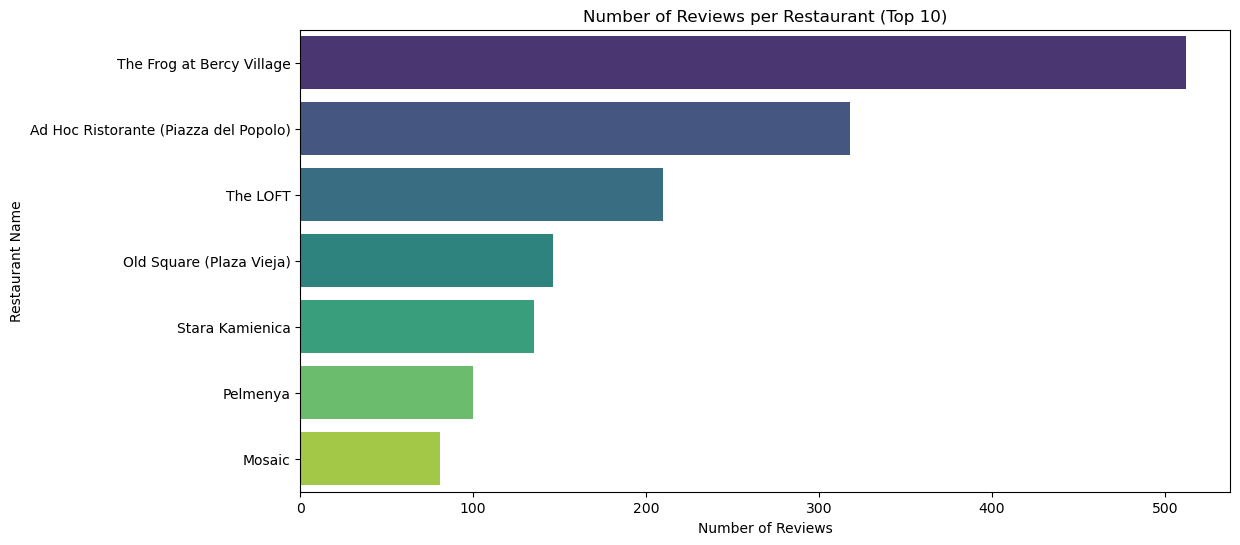

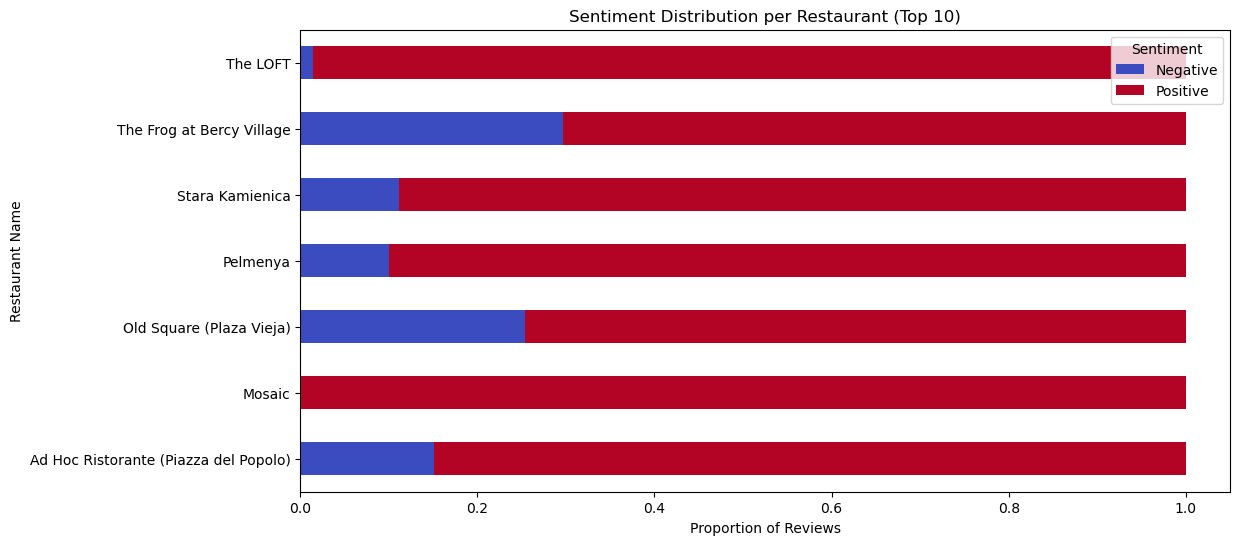

In [29]:

# =========================
# 9️⃣ Restaurant Analysis (Top 10)
# =========================
top_restaurants = df['Restaurant Name'].value_counts().head(10).index
df_top = df[df['Restaurant Name'].isin(top_restaurants)]

# Number of reviews per restaurant
plt.figure(figsize=(12,6))
sns.countplot(
    y='Restaurant Name',
    data=df_top,
    order=top_restaurants,
    palette='viridis'
)
plt.title("Number of Reviews per Restaurant (Top 10)")
plt.xlabel("Number of Reviews")
plt.ylabel("Restaurant Name")
plt.show()

# Sentiment distribution per restaurant
avg_sentiment = df_top.groupby('Restaurant Name')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
avg_sentiment.plot(kind='barh', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Sentiment Distribution per Restaurant (Top 10)")
plt.xlabel("Proportion of Reviews")
plt.ylabel("Restaurant Name")
plt.show()

In [30]:

from scipy.sparse import hstack
import numpy as np

# =========================
# 1️⃣ Define Manual Test Sentences
# =========================
manual_sentences = [
    # Easy sentences
    "The food was amazing and the service was excellent!",
    "I hated the meal, it was terrible and cold.",

    # Hard/mixed sentences
    "The restaurant had good ambiance but the food was disappointing.",
    "I expected better from such a famous place, though some dishes were nice.",
    "Service was okay, but the waiter was rude at times.",

    # Additional hard examples
    "The food was good, but the service was very slow.",
    "I liked the dessert, but everything else was disappointing.",
    "Not the best, but not the worst either.",
    "I would have enjoyed the meal if it wasn't so salty.",
    "This place never fails to disappoint me."
]

true_labels = [
    "Positive", "Negative", "Negative", "Positive", "Negative",
    "Negative", "Negative", "Positive", "Negative", "Negative"
]

# Create DataFrame
manual_df = pd.DataFrame({
    "Review": manual_sentences,
    "TrueLabel": true_labels
})

# =========================
# 2️⃣ Transform to TF-IDF
# =========================
manual_tfidf = tfidf.transform(manual_df['Review'])

# =========================
# 3️⃣ Create numerical features
# =========================
manual_num = np.array([
    [
        len(s),
        len(s.split()),
        s.count('!'),
        s.count('?'),
        sum(word in s.lower() for word in positive_words),
        sum(word in s.lower() for word in negative_words)
    ] for s in manual_df['Review']
])

# =========================
# 4️⃣ Combine TF-IDF and numerical features
# =========================
manual_combined = hstack([manual_tfidf, manual_num])

# =========================
# 5️⃣ Predict using trained Naive Bayes model
# =========================
manual_df['PredictedLabel'] = nb_model.predict(manual_combined)

# =========================
# 6️⃣ Display results
# =========================
print(manual_df)

# =========================
# 7️⃣ Optional: Accuracy on manual test sentences
# =========================
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(manual_df['TrueLabel'], manual_df['PredictedLabel'])
print(f"\nAccuracy on Manual Test Sentences: {accuracy:.2f}")



                                              Review TrueLabel PredictedLabel
0  The food was amazing and the service was excel...  Positive       Positive
1        I hated the meal, it was terrible and cold.  Negative       Negative
2  The restaurant had good ambiance but the food ...  Negative       Positive
3  I expected better from such a famous place, th...  Positive       Positive
4  Service was okay, but the waiter was rude at t...  Negative       Positive
5  The food was good, but the service was very slow.  Negative       Positive
6  I liked the dessert, but everything else was d...  Negative       Negative
7            Not the best, but not the worst either.  Positive       Negative
8  I would have enjoyed the meal if it wasn't so ...  Negative       Positive
9           This place never fails to disappoint me.  Negative       Positive

Accuracy on Manual Test Sentences: 0.40


In [31]:
import seaborn as sns
import pandas as pd

# Count positive and negative words in each sentence
manual_df['PosWords'] = manual_df['Review'].apply(lambda s: sum(word in s.lower() for word in positive_words))
manual_df['NegWords'] = manual_df['Review'].apply(lambda s: sum(word in s.lower() for word in negative_words))

# Prepare data for heatmap
heatmap_data = manual_df[['Review', 'PosWords', 'NegWords', 'Correct']]
heatmap_data = heatmap_data.set_index('Review')

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data[['PosWords','NegWords','Correct']], annot=True, cmap='YlGnBu', cbar=False)
plt.title("Heatmap: Positive/Negative Word Counts & Correct Predictions")
plt.show()


KeyError: "['Correct'] not in index"

In [ ]:
manual_df['Mixed'] = manual_df['Review'].apply(
    lambda x: 1 if any(word in x.lower() for word in positive_words) 
                 and any(word in x.lower() for word in negative_words) 
                 else 0
)

mixed_acc = manual_df[manual_df['Mixed']==1]['Correct'].mean()
easy_acc = manual_df[manual_df['Mixed']==0]['Correct'].mean()

print(f"Accuracy on Mixed Sentences: {mixed_acc:.2f}")
print(f"Accuracy on Easy Sentences: {easy_acc:.2f}")


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score



# =========================
# 2️⃣ Transform TF-IDF and create numerical features
# =========================
manual_tfidf = tfidf.transform(manual_df['Review'])

# Create numerical features
manual_num = np.array([
    [
        len(s),
        len(s.split()),
        s.count('!'),
        s.count('?'),
        sum(word in s.lower() for word in positive_words),
        sum(word in s.lower() for word in negative_words)
    ] for s in manual_df['Review']
])

# Combine TF-IDF + numerical features
manual_combined = hstack([manual_tfidf, manual_num])

# =========================
# 3️⃣ Predict using trained Naive Bayes model
# =========================
manual_df['PredictedLabel'] = nb_model.predict(manual_combined)

# =========================
# 4️⃣ Correct prediction column
# =========================
manual_df['Correct'] = (manual_df['TrueLabel'] == manual_df['PredictedLabel']).astype(int)

# =========================
# 5️⃣ Mixed column (between positive & negative words)
# =========================
manual_df['Mixed'] = manual_df['Review'].apply(
    lambda x: 1 if any(word in x.lower() for word in positive_words) and any(word in x.lower() for word in negative_words) else 0
)

# =========================
# 6️⃣ Accuracy on Easy vs Hard/Mixed sentences (as percentage)
# =========================
easy_acc = manual_df[manual_df['Mixed']==0]['Correct'].mean() * 100
hard_acc = manual_df[manual_df['Mixed']==1]['Correct'].mean() * 100
print(f"Accuracy on Easy Sentences: {easy_acc:.1f}%")
print(f"Accuracy on Hard/Mixed Sentences: {hard_acc:.1f}%")

# =========================
# 7️⃣ Bar chart: Easy vs Hard accuracy (percentage)
# =========================
plt.figure(figsize=(6,4))
colors = ['green','orange']
plt.bar(['Easy','Hard'], [easy_acc, hard_acc], color=colors)
plt.ylim(0,100)  # from 0% to 100%
plt.ylabel('Accuracy (%)')
plt.title('Naive Bayes Accuracy: Easy vs Hard Sentences')
for i, v in enumerate([easy_acc, hard_acc]):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# =========================
# 9️⃣ Display final table
# =========================
display(manual_df[['Review','TrueLabel','PredictedLabel','Correct','Mixed','PosWords','NegWords']])


In [ ]:
from wordcloud import WordCloud

text_pos = " ".join(df[df['Sentiment']=='Positive']['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_pos)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()


In [ ]:
sns.histplot(data=df, x='review_length', hue='Sentiment', bins=30, kde=True)
plt.title("Distribution of Review Length by Sentiment")
plt.show()


Accuracy: 0.7735849056603774
              precision    recall  f1-score   support

    Negative       0.72      0.91      0.80        53
    Positive       0.87      0.64      0.74        53

    accuracy                           0.77       106
   macro avg       0.79      0.77      0.77       106
weighted avg       0.79      0.77      0.77       106



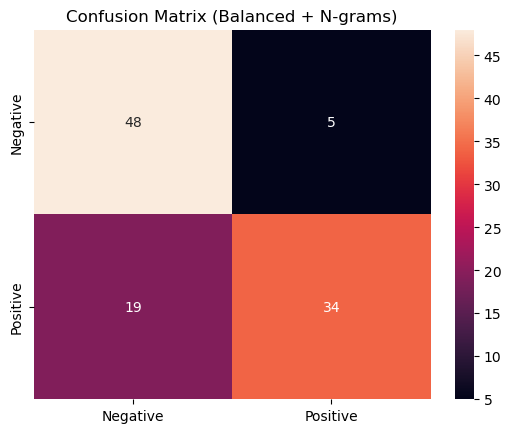

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.sparse import hstack
import seaborn as sns
import matplotlib.pyplot as plt

# =========================
# Feature Engineering (على df_bal)
# =========================
df_bal["review_length"] = df_bal["Review"].astype(str).apply(len)
df_bal["word_count"] = df_bal["Review"].astype(str).apply(lambda x: len(x.split()))
df_bal["exclamation_count"] = df_bal["Review"].astype(str).apply(lambda x: x.count("!"))
df_bal["question_count"] = df_bal["Review"].astype(str).apply(lambda x: x.count("?"))

num_features = ["review_length","word_count","exclamation_count","question_count"]

X_text = df_bal["Review"].astype(str)
X_num  = df_bal[num_features].values
y      = df_bal["Sentiment"]

# تقسيم Stratify عشان يظل التوازن موجود بالـ train/test
X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_num, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# TF-IDF with N-grams ✅
# =========================
tfidf = TfidfVectorizer(
    stop_words="english",
    lowercase=True,
    ngram_range=(1, 3),     # ✅ N-grams (1 to 3)
    max_features=12000,
    min_df=2,
    max_df=0.9,
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf  = tfidf.transform(X_test_text)

# دمج النص + الأرقام
X_train = hstack([X_train_tfidf, X_train_num])
X_test  = hstack([X_test_tfidf,  X_test_num])

# =========================
# Train + Evaluate
# =========================
nb = MultinomialNB(alpha=0.3)
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title("Confusion Matrix (Balanced + N-grams)")
plt.show()